minimum nearest obstacle distance is 0.846558
average obstacle distance is 1.349855492063492
The maximum translational velocity is: 0.3699719981424135
The average translational velocity is: 0.2199876623782302


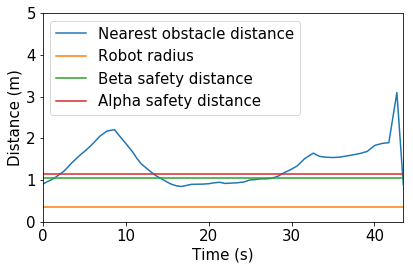

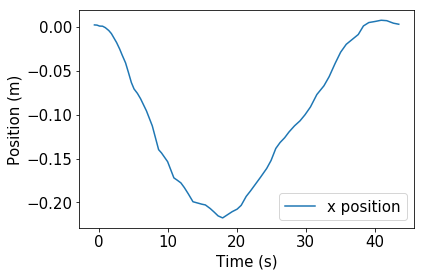

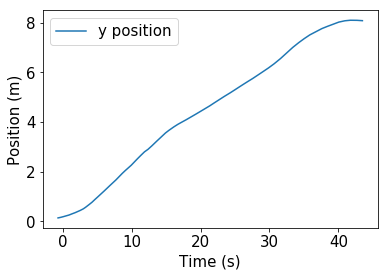

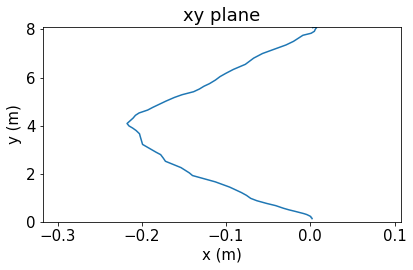

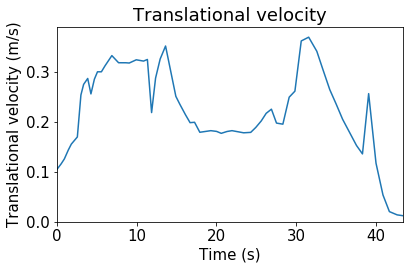

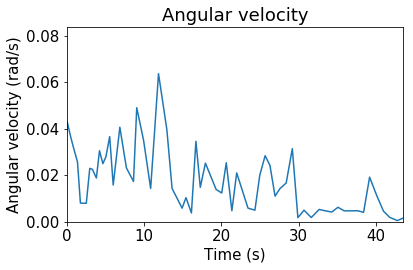

In [29]:
#location of file: /home/thorstef/catkin_ws/src/obstacle-avoidance/data/
# data in following order:

#old ones are missing time..

# new ones have time included:
# 0: Time (seconds) 1: Nearest obstacle distance 2: robot position x, 3: robot position y, 4: robot position z
# 5: robot orientation x, 6: robot orientation y, 7: robot orientation z, 8: robot orientation w
# robot translational velocity: 9: x, 10: y, 11: z
# robot angular velocity: 12: x, 13: y, 14: z
# even newer also have:
# local robot translational velocity: 15: x, 16: y, 17: z
# local robot angular velocity: 18: x, 19: y, 20: z

#try plotting some shit:
from matplotlib import pyplot;
from pylab import genfromtxt;
import matplotlib
import pylab
import numpy as np;
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/06-06-2018_05:22:52.txt");
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/06-06-2018_07:48:40.txt");
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/06-06-2018_07:02:01.txt");
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/06-06-2018_07:48:40.txt");
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/06-06-2018_09:48:52.txt");

# with safety distance for translational velocity 2 times higher than for angle :
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/07-06-2018_12:09:37.txt");
# with safety distance for translational velocity 3 times higher than for angle (safety dist 50 cm):
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/07-06-2018_12:37:41.txt");
# with safety distance for translational velocity 3 times higher than for angle (safety dist 40 cm):
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/08-06-2018_12:01:12.txt");
# With some margin on fixed position:
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/08-06-2018_02:16:51.txt");
#safety dist 50 cm:
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/08-06-2018_02:30:34.txt");
# with 50 cm safety for alpha, 40 for beta:
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/08-06-2018_03:04:48.txt");
# 50 for alpha, 35 for beta:
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/08-06-2018_04:36:14.txt");
# 50 for alpha, 40 for beta, 1.5 for vel safety dist, but now velocity equation correct:
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/13-06-2018_02:20:19.txt");
# 50 for alpha, 40 for beta, 1.0 for vel safety dist
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/13-06-2018_02:40:28.txt");
# 0.7 for alpha, 0.6 for beta, 1.2 for vel safety dist
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/13-06-2018_03:01:04.txt");
# 0.8 for alpha, 0.7 for beta, 1.2 for vel safety dist
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/13-06-2018_03:42:23.txt");
#another run 2, remember to put this in appendix... :
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/21-06-2018_12:37:08.txt");

#Run with teraranger and sonar data when necessary:
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/27-06-2018_07:15:42.txt");
# another one, 0.7 for alpha, 0.6 for beta, 7cm crit safety, 1.2 for vel safety dist
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/28-06-2018_04:21:23.txt");
#  0.8 for alpha, 0.7 for beta, 7cm crit safety, 1.2 for vel safety dist
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/28-06-2018_05:04:22.txt");
# another
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/28-06-2018_05:51:22.txt");
# another to add to appendix: 
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/28-06-2018_11:59:31.txt");
#one more
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/04-07-2018_04:19:07.txt");
#another, currently in main thesis:
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/04-07-2018_05:07:42.txt");
#with v_max = 0.8m/s
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/11-07-2018_03:36:46.txt");


#Simple test case with wall:
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/07-06-2018_12:57:04.txt");
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/07-06-2018_02:08:05.txt");
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/07-06-2018_05:03:21.txt");
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/08-06-2018_05:31:59.txt");
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/.txt");
# 0.8 for alpha, 0.7 for beta, 1.2 for vel safety dist
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/13-06-2018_05:09:04.txt");
#another run 1
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/20-06-2018_11:52:03.txt");
#Run with teraranger and sonar data when necessary, 0.8 for alpha, 0.7 for beta, 7cm crit safety,
#1.2 for vel safety dist:
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/28-06-2018_08:04:46.txt");
#antoher new run:
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/04-07-2018_04:40:06.txt");
#another extra:
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/06-07-2018_05:05:08.txt");
#antoher
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/06-07-2018_05:38:10.txt");
#antoher
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/06-07-2018_05:52:36.txt");


# Narrow passage test,  50 for alpha, 35 for beta: 
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/09-06-2018_04:12:18.txt");
# 0.8 for alpha, 0.7 for beta, 1.2 for vel safety dist
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/13-06-2018_04:00:30.txt");
#Run with teraranger and sonar data when necessary, 0.8 for alpha, 0.7 for beta, 7cm crit safety,
#1.2 for vel safety dist:
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/28-06-2018_08:35:49.txt");
#another run:
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/28-06-2018_08:50:37.txt");
#another, in main report:
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/28-06-2018_09:01:19.txt");
#another, extra
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/06-07-2018_04:13:22.txt");
#another
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/06-07-2018_04:43:31.txt");

# window challenge:
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/09-06-2018_04:30:06.txt");


# trap 3, needs to go over.. .50 for alpha, 35 for beta, no constraints on location of dominant directions... :
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/09-06-2018_05:03:05.txt");
# 0.8 for alpha, 0.7 for beta, 1.2 for vel safety dist
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/13-06-2018_05:28:07.txt");
#once more:
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/20-06-2018_10:34:49.txt");
#Run with teraranger and sonar data when necessary, 0.8 for alpha, 0.7 for beta, 7cm crit safety,
#1.2 for vel safety dist:
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/28-06-2018_07:27:25.txt");
# another: 28-06-2018_07:41:53 maybe 
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/28-06-2018_07:41:53.txt");
# another
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/11-07-2018_06:41:19.txt");
#extra run 2:
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/11-07-2018_06:53:51.txt");
# extra run 3:
#mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/13-07-2018_02:27:26.txt");
#extra run 4:
mat0 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/13-07-2018_02:41:50.txt");


matplotlib.rcParams.update({'font.size': 15})

#obstacle_course = "simple_wall_extra4"
#obstacle_course = "narrow_passage_extra4"
obstacle_course = "trap3_extra4"
#obstacle_course = "corridor4"


# to cut off first elements of data, 30 for sw, 10 for np, 45 for corridor
# and cut off last elements 7 for trap
#new: cut off first elements of data, 23 for sw, 7 for np, 43 for trap, 3 for corridor
#newer: start at 18 for sw,55 for np, 23 - 5 for trap
mat0 = mat0[26:mat0.shape[0]-10,:]

#time start 100 fir sw, 33 for narrow passage, 102 for corridor
#new: 103 for sw, 60 for np, 69 for trap, 28 for corridor
#newer: 36 for sw, 57 for np, 33 for trap, 24.5 for corridor
time_start = 45



save_figures = True


#mat1 = genfromtxt("data1.txt");
pyplot.figure(0)
pyplot.plot(mat0[:,0]-time_start, mat0[:,1], label = "Nearest obstacle distance");
pylab.ylim([0,5])
pylab.xlim([0,max(mat0[:,0]) - time_start])
x = [0, mat0[len(mat0[:,0])-1,0] -time_start]
y = [0.35, 0.35]
pyplot.plot(x,y, label = "Robot radius");
y = [1.05, 1.05]
pyplot.plot(x,y, label = "Beta safety distance");
y = [1.15, 1.15]
pyplot.plot(x,y, label = "Alpha safety distance");
pyplot.xlabel("Time (s)")
pyplot.ylabel("Distance (m)")
pyplot.legend();
pyplot.tight_layout();
if save_figures:
    pyplot.savefig('/home/thorstef/catkin_ws/src/obstacle-avoidance/plots/' + obstacle_course + '_nearest_obstacle.eps', format='eps', dpi=1000)
    #pyplot.savefig('/home/thorstef/catkin_ws/src/obstacle-avoidance/plots/' + obstacle_course + '_nearest_obstacle.svg', format='svg', dpi=1000)

pyplot.figure(1)
pyplot.plot(mat0[:,0] - time_start, mat0[:,2], label = "x position");
pyplot.legend();
pyplot.xlabel("Time (s)")
pyplot.ylabel("Position (m)")
#pyplot.plot(mat1[:,0], mat1[:,1], label = "data1");

pyplot.figure(2)
pyplot.plot(mat0[:,0]-time_start, mat0[:,3], label = "y position");
pyplot.legend();
pyplot.xlabel("Time (s)")
pyplot.ylabel("Position (m)")

# pyplot.figure(6)
# pyplot.plot(mat0[:,0] - time_start, mat0[:,4], label = "z position");
# pyplot.legend();
# pyplot.xlabel("Time (s)")
# pyplot.ylabel("Position (m)")


pyplot.figure(3)
# To plot yz plane:
# pyplot.plot(mat0[:,3], mat0[:,4], label = "Height in yz plane");
# pyplot.title("yz plane")
# pyplot.xlabel("y (m)")
# pyplot.ylabel("z (m)")
# pylab.ylim([0,max( mat0[:,4]) + 0.1])
# pylab.xlim([0,max( mat0[:,3])])

# To plot xy plane:
pyplot.plot(mat0[:,2], mat0[:,3], label = "xy plane");
pyplot.title("xy plane")
pyplot.xlabel("x (m)")
pyplot.ylabel("y (m)")
pylab.xlim([min( mat0[:,2])-0.1,max( mat0[:,2])+0.1])
pylab.ylim([0,max( mat0[:,3])])

# To plot xz plane:
# pyplot.plot(mat0[:,2], mat0[:,4], label = "xz plane");
# pyplot.title("xz plane")
# pyplot.xlabel("x (m)")
# pyplot.ylabel("z (m)")
# pylab.xlim([0,max( mat0[:,2])])
# pylab.ylim([0,max( mat0[:,4])+0.5])

#pyplot.legend();
pyplot.tight_layout();

if save_figures:
    #pyplot.savefig('/home/thorstef/catkin_ws/src/obstacle-avoidance/plots/' + obstacle_course + '_yz_plane.eps', format='eps', dpi=1000)
    pyplot.savefig('/home/thorstef/catkin_ws/src/obstacle-avoidance/plots/' + obstacle_course + '_xy_plane.eps', format='eps', dpi=1000)
    #pyplot.savefig('/home/thorstef/catkin_ws/src/obstacle-avoidance/plots/' + obstacle_course + '_xz_plane.eps', format='eps', dpi=1000)


# try plotting total translational and angular velocity:
translational_velocity = np.zeros(mat0.shape[0])
angular_velocity = np.zeros(mat0.shape[0])


average_nearest_obstacle_distance = np.average(mat0[:,1]) 
print("minimum nearest obstacle distance is " + str(min(mat0[:,1])))
print("average obstacle distance is " + str(average_nearest_obstacle_distance))
# Find average translational velocity:

sum = 0.0;
for i in range(0, len(mat0[:,1])):
    translational_velocity[i] = np.sqrt(mat0[i,9]**2+mat0[i,10]**2+mat0[i,11]**2)
    sum += translational_velocity[i] #np.sqrt(mat0[i,9]**2+mat0[i,10]**2+mat0[i,11]**2)
    angular_velocity[i] = np.sqrt(mat0[i,12]**2+mat0[i,13]**2+mat0[i,14]**2)

average_translational_velocity = sum / len(mat0[:,1])

print("The maximum translational velocity is: " + str(np.max(translational_velocity)))
print("The average translational velocity is: " + str(average_translational_velocity))   

pyplot.figure(4)
pyplot.plot(mat0[:,0] - time_start, translational_velocity[:], label = "translational velocity");
#pyplot.legend();
pyplot.title("Translational velocity")
pyplot.xlabel("Time (s)")
pyplot.ylabel("Translational velocity (m/s)")
pyplot.tight_layout();
pylab.ylim([0,max(translational_velocity) + 0.02])
pylab.xlim([0,max(mat0[:,0]) - time_start])
if save_figures:
    pyplot.savefig('/home/thorstef/catkin_ws/src/obstacle-avoidance/plots/' + obstacle_course + '_translational_velocity.eps', format='eps', dpi=1000)

    
pyplot.figure(5)
pyplot.plot(mat0[:,0] - time_start, angular_velocity[:], label = "angular velocity");
#pyplot.legend();
pyplot.title("Angular velocity")
pyplot.xlabel("Time (s)")
pyplot.ylabel("Angular velocity (rad/s)")
pyplot.tight_layout();
pylab.ylim([0,max(angular_velocity) + 0.02])
pylab.xlim([0,max(mat0[:,0]) - time_start])
if save_figures:
    pyplot.savefig('/home/thorstef/catkin_ws/src/obstacle-avoidance/plots/' + obstacle_course + '_angular_velocity.eps', format='eps', dpi=1000)


pyplot.show();


mat1 length: 1362mat2 length: 463
The average time between publishing direction of motion is: 0.21211168258633356
The average time to calculate subspaces and motion constraints is: 0.18000734753857459
The maximum time to calculate subspaces and motion constraints is: 0.508
The average time to calculate S_2 is: 0.1236678912564291
The average time to calculate spherical matrix is: 0.10925974025974027
The average time to publish OctoMap is: 0.6242943722943723


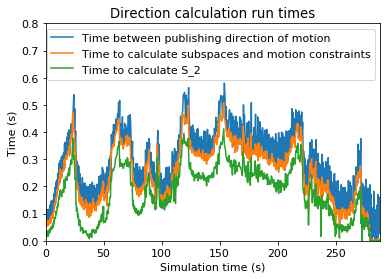

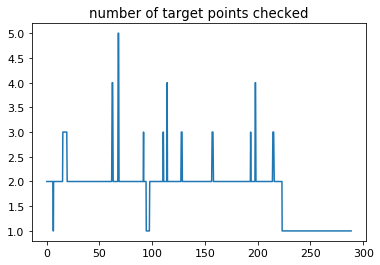

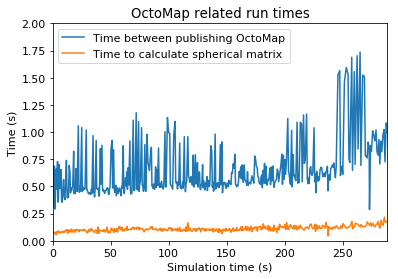

In [42]:
#Plot time measurements:

from matplotlib import pyplot;
from pylab import genfromtxt;
import matplotlib
import pylab
import numpy as np;
# From motion computation
# 0: time 1:time between callbacks 2: time to find reachable target point 3: number of target points checked
#for trap
#mat1 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/times20-06-2018_10:34:49.txt");
#for corridor ah forgot about time to run callback... 
#mat1 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/times20-06-2018_11:52:03.txt");

# some other run:
# mat1 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/times27-06-2018_11:38:32.txt");
# # corridor 0.7 for alpha, 0.6 for beta, 7cm crit safety, 1.2 for vel safety dist
# mat1 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/times28-06-2018_04:21:23.txt");
# mat2 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/octomap_time28-06-2018_04:21:33.txt");
# # corridor 0.8 for alpha, 0.7 for beta, 7cm crit safety, 1.2 for vel safety dist
# mat1 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/times28-06-2018_05:04:22.txt");
# mat2 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/octomap_time28-06-2018_05:04:33.txt");
# again
# mat1 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/runtime/28-06-2018_05:51:22.txt");
# mat2 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/octomap_to_spherical_runtime/28-06-2018_05:51:33.txt");
#another, now check octomap publish time.. 
# mat1 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/runtime/28-06-2018_11:59:41.txt");
# mat2 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/octomap_to_spherical_runtime/28-06-2018_11:59:41.txt");
# mat3 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/octomap_callback_runtime/28-06-2018_11:59:31.txt");
# with recording of s2:
# mat1 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/runtime/04-07-2018_04:19:07.txt");
# mat2 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/octomap_to_spherical_runtime/04-07-2018_04:19:17.txt");
# mat3 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/octomap_callback_runtime/04-07-2018_04:19:07.txt");
#another:
mat1 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/runtime/04-07-2018_05:07:42.txt");
mat2 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/octomap_to_spherical_runtime/04-07-2018_05:07:53.txt");
mat3 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/octomap_callback_runtime/04-07-2018_05:07:42.txt");

#simple wall:
# mat1 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/runtime/04-07-2018_04:40:06.txt");
# mat2 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/octomap_to_spherical_runtime/04-07-2018_04:38:45.txt");
# mat3 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/octomap_callback_runtime/04-07-2018_04:40:06.txt");

#some dumb try:
#mat3 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/octomap_callback_runtime/29-06-2018_04:16:43.txt");



matplotlib.rcParams.update({'font.size': 11})

#obstacle_course = "simple_wall"
#obstacle_course = "narrow_passage"
#obstacle_course = "trap3"
obstacle_course = "corridor4"


#to cut off part of data
front = 1
back = 0

print("mat1 length: " + str(mat1.shape[0]) + "mat2 length: " + str(mat2.shape[0]))

# mat1 = mat1[20:mat1.shape[0]-1000,:]
# mat2 = mat2[1:mat2.shape[0]-70,:]
# mat3 = mat3[1:mat3.shape[0]-70,:]

mat1 = mat1[1:mat1.shape[0],:]
mat2 = mat2[1:mat2.shape[0],:]
mat3 = mat3[1:mat3.shape[0],:]

time_start = 74

save_time_figures = True;

pyplot.figure(0)
pylab.ylim([0,0.8])
#pyplot.plot(mat1[:,0]-time_start, mat1[:,1], label = "Total time to calculate direction of motion");
pyplot.plot(mat1[:,0]-time_start, mat1[:,1], label = "Time between publishing direction of motion");

#pyplot.plot(mat1[:,0]-time_start, mat1[:,2], label = "time to run callback");
# pyplot.plot(mat1[:,0]-time_start, mat1[:,3], label = "time to find reachable target point");
pyplot.plot(mat1[:,0]-time_start, mat1[:,4], label = "Time to calculate subspaces and motion constraints");
pyplot.plot(mat1[:,0]-time_start, mat1[:,5], label = "Time to calculate S_2");
pylab.xlim([0,max(mat1[:,0]) - time_start])

#Plot spherical matrix time:
#trap3
#mat2 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/octomap_time20-06-2018_10:34:58.txt");
#corridor
# mat2 = genfromtxt("/home/thorstef/catkin_ws/src/obstacle-avoidance/data/octomap_time20-06-2018_11:52:13.txt");

#to cut off part of data
#mat2 = mat2[1:mat2.shape[0],:]
#time_start = 0

pyplot.xlabel("Simulation time (s)")
pyplot.ylabel("Time (s)")
pyplot.title("Direction calculation run times")
pyplot.legend();

if save_time_figures:
    pyplot.savefig('/home/thorstef/catkin_ws/src/obstacle-avoidance/plots/' + obstacle_course + 'runtimes.eps', format='eps', dpi=1000)


pyplot.figure(2)
pylab.ylim([0,2])

#pyplot.plot(mat2[:,0]-time_start, mat2[:,2], label ="Time to locate subgoals");


#pyplot.title("Time to calculate spherical matrix")
#pyplot.figure(2)
pyplot.plot(mat3[:,0]-time_start, mat3[:,1], label ="Time between publishing OctoMap");
pyplot.plot(mat2[:,0]-time_start, mat2[:,1], label ="Time to calculate spherical matrix");
pyplot.xlabel("Simulation time (s)")
pyplot.ylabel("Time (s)")
pyplot.title("OctoMap related run times")
pylab.xlim([0,max(mat3[:,0]) - time_start])

pyplot.legend();

if save_time_figures:
    pyplot.savefig('/home/thorstef/catkin_ws/src/obstacle-avoidance/plots/' + obstacle_course + 'octomap_runtimes.eps', format='eps', dpi=1000)


pyplot.figure(1)
pyplot.plot(mat1[:,0]-time_start, mat1[:,6], label = "number of target points checked");
#pyplot.plot(mat1[:,0]-time_start, mat1[:,5], label = "number of target points checked");
pyplot.title("number of target points checked")


average_time_between_publishing_direction_of_motion = np.average(mat1[:,1])

average_time_to_calculate_motion_constraints = np.average(mat1[:,4])
max_time_to_calculate_motion_constraints = np.max(mat1[:,4])

average_time_to_calculate_S2 = np.average(mat1[:,5])

average_time_to_calculate_spherical_matrix = np.average(mat2[:,1])

average_time_to_publish_octomap = np.average(mat3[:,1])


print("The average time between publishing direction of motion is: " 
      + str(average_time_between_publishing_direction_of_motion))

print("The average time to calculate subspaces and motion constraints is: " 
      + str(average_time_to_calculate_motion_constraints))
print("The maximum time to calculate subspaces and motion constraints is: " 
      + str(max_time_to_calculate_motion_constraints))

print("The average time to calculate S_2 is: " 
      + str(average_time_to_calculate_S2))

print("The average time to calculate spherical matrix is: " 
      + str(average_time_to_calculate_spherical_matrix))

print("The average time to publish OctoMap is: " 
      + str(average_time_to_publish_octomap))



